# Data Simulation

参考论文：https://iopscience.iop.org/article/10.1088/1681-7575/aad146

### 1. 生成相位数据，依据公式（7）

#### 1.1 生成2个相互独立的维纳过程

In [1]:
import numpy as np
clock_size = 5  # i
T = 86400 * 30
t = np.arange(0,T)  # 0,1,2,3...100
x_0 = 0
y_0 = 10 ** (-14)
mu_1 = 8.8 * 10 ** (-14)
mu_2 = 5.6 * 10 ** (-18)
d_i = 0

Refer to: https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html <br>
$X(0) = X_0, X(t + dt) = X(t) + N(0, (delta)^2 dt; t, t+dt)$
where $N(a, b; t_1, t_2)$ is a normally distributed random variable with mean a and variance b. The parameters $t_1$ and $t_2$ make explicit the statistical independence of N on different time intervals; that is, if $[t_1, t_2)$ and $[t_3, t_4)$ are disjoint intervals, then $N(a, b; t_1, t_2)$ and $N(a, b; t_3, t_4)$ are independent.

In [2]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

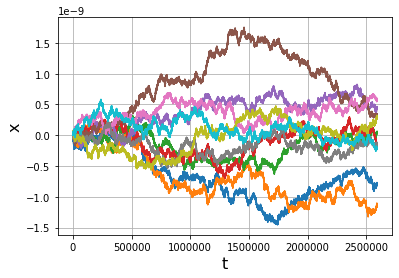

In [3]:
from pylab import plot, show, grid, xlabel, ylabel

# The Wiener process parameter.
delta = 5 * 10 ** (-13)
# Number of steps.
N = T
# Time step size
dt = T/N
# Number of realizations to generate.
m = clock_size * 2
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x, x0
x[:, 0] = 0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

t_all = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t_all, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

#### 1.2 计算x(t)

$ x{_i}(t)=x{_i}(0) + y{_i}(0) * t + 0.5 * d{_i} * t^{2} + \mu_i^{1} * W_i^{1}(t) + \mu_i^{2} * \sum_{s=0}^{t}W_i^{2}(s) $

$ i = 1,2,3..., x_{i}(0) = 0, y_{i}(0) = 1 * 10^{-14}, μ_i^1 = 8.8 * 10^{-14}, μ_i^2 = 5.6 * 10^{-18}, d_i = 0$

In [4]:
w1 = x[0:clock_size,:-1]
w2_square_sum = (x[clock_size:,:-1] ** 2)

In [5]:
for i in range(N-1):
    w2_square_sum[:,i+1] += w2_square_sum[:,i]

In [6]:
print(w2_square_sum)

[[0.00000000e+00 6.04319827e-26 9.89752425e-25 ... 2.55831596e-12
  2.55831606e-12 2.55831616e-12]
 [0.00000000e+00 8.70282499e-26 1.30346152e-25 ... 4.01331074e-13
  4.01331388e-13 4.01331702e-13]
 [0.00000000e+00 8.03954278e-26 8.15728632e-26 ... 1.37464625e-13
  1.37464652e-13 1.37464679e-13]
 [0.00000000e+00 4.26142069e-25 7.70464690e-25 ... 1.77490661e-13
  1.77490735e-13 1.77490810e-13]
 [0.00000000e+00 3.87002101e-25 7.48685995e-25 ... 9.87289957e-14
  9.87290359e-14 9.87290762e-14]]


In [7]:
print(w1)

[[ 0.00000000e+00  7.46763447e-13  1.05909259e-12 ... -8.12095286e-10
  -8.12244577e-10 -8.11854069e-10]
 [ 0.00000000e+00  9.33337493e-13  1.21799633e-12 ... -1.15439971e-09
  -1.15498934e-09 -1.15521425e-09]
 [ 0.00000000e+00 -9.42188605e-14  3.24019948e-13 ...  5.29824057e-11
   5.25554242e-11  5.21115256e-11]
 [ 0.00000000e+00  2.54022416e-13  4.36436686e-13 ... -1.92162254e-10
  -1.90924724e-10 -1.90775570e-10]
 [ 0.00000000e+00 -9.42981441e-13 -8.08777866e-13 ...  4.21336327e-10
   4.21016953e-10  4.21095992e-10]]


In [8]:
x_t = x_0 + y_0 * t + 0.5 * d_i * t ** 2 + mu_1 * w1 + mu_2 * w2_square_sum

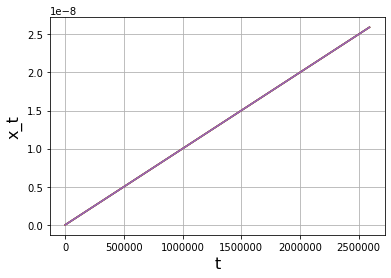

In [9]:
for k in range(x_t.shape[0]):
    plot(t, x_t[k])
xlabel('t', fontsize=16)
ylabel('x_t', fontsize=16)
grid(True)
show()

### 2. 由相位数据，生成频率数据，依据公式（8）

#### 2.1 初始化环境灵敏系数，依据 table 1

In [10]:
tau = 1

SST = -5 * 10 ** (-15)  # Static temperature
SDT = -1 * 10 ** (-14)  # Dynamic temperature
SM = 8 * 10 ** (-16)    # Magnetic field
SH = 2 * 10 ** (-16)    # Relative humidity

#### 2.2 初始化温度、湿度和磁场变化的数据分布 

In a typical temperature-controlled room, the peak-to-peak values of temperature, the rate of temperature change, the magnetic field and the relative humidity fluctuations are approximately 1 °C, 0.05 °C s−1, 0.12 μT and 3.5%, respectively, which leads to a maximum H-maser frequency change at the magnitude of 10^−15

$ T(t) = 0.5 * sin(\frac{\pi x}{20}) $

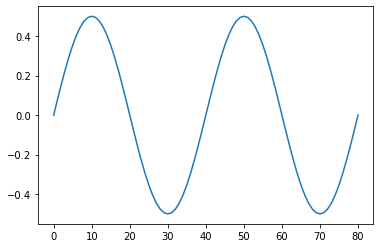

In [11]:
import math

delta_T = np.sin(np.arange(T) * math.pi / 20) * 0.5
delta_M = 0.12
delta_H = 0.035

plot(delta_T[0:81])

#### 2.3 生成频率数据

$ Y{_i}(t) = \frac{x{_i}(t + \tau) - x{_i}(t)}{\tau} + S_{ST} * [T_i(t) - T_i(0)] + S_{DT} * \frac{dT_i(t)}{dt} + S_M * [M_i(t) - M_i(0)] + S_H * [H_i(t) - H_i(0)] $

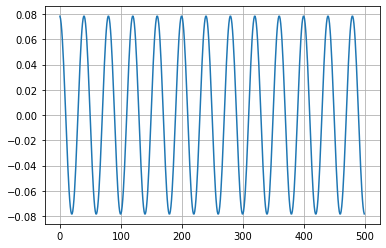

In [12]:
dx = np.diff(x_t)
dT = np.diff(delta_T)

plot(t[0:500], dT[0:500])
grid(True)
show()

Y_t = dx + SST * delta_T[:-1] + SDT * dT + SM * delta_M + SH * delta_H

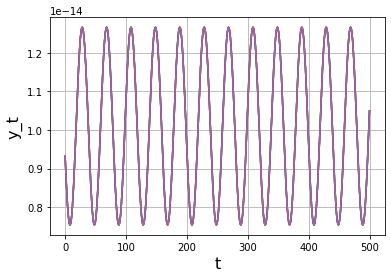

In [13]:
for k in range(Y_t.shape[0]):
    #plot(t[:-1], Y_t[k])
    plot(t[0:500], Y_t[k][0:500])
xlabel('t', fontsize=16)
ylabel('y_t', fontsize=16)
grid(True)
show()

#### 2.4 保存模拟数据

In [22]:
with open('simulated_data.npy', 'wb') as f:
    np.save(f, Y_t)
print("Simulated Data saved as 'simulated_data.npy'")

Simulated Data saved as 'simulated_data.npy'


#### 3. 计算Gamma，并绘制 figure 3

#### 3.1 每两台钟，做差并计算allan variance

In [14]:
# https://allantools.readthedocs.io/en/latest/functions.html
!pip install allantools
import allantools

You should consider upgrading via the 'pip install --upgrade pip' command.


taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [7.70037019e-25 3.39191830e-25 1.65647074e-25 8.19662710e-26
 4.13891223e-26 2.05401426e-26 1.06240318e-26 5.37320085e-27
 2.80457101e-27 1.42815106e-27 6.66889176e-28 3.20810341e-28
 1.82157358e-28 8.81604708e-29 2.42509697e-29 1.37210584e-29
 1.00400061e-29 6.65229200e-30 1.56572086e-32 1.27840573e-32]


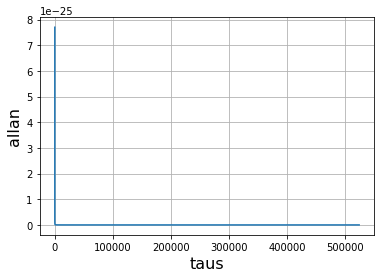

In [15]:
delta_01 = Y_t[0] - Y_t[1]
# Calculate Allan variance
(taus, adevs_01, errors, ns) = allantools.adev(delta_01)
print('taus - %s, adevs - %s' % (taus, adevs_01))

plot(taus, adevs_01)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [7.68912023e-25 3.39038148e-25 1.64984523e-25 8.19825196e-26
 4.14864877e-26 2.07316076e-26 1.05735838e-26 5.29072248e-27
 2.78298913e-27 1.32778694e-27 6.42590860e-28 3.23276764e-28
 1.82328486e-28 7.68263193e-29 2.06439983e-29 1.37152103e-29
 7.09400765e-30 5.15367707e-30 7.05778093e-32 5.76265400e-32]


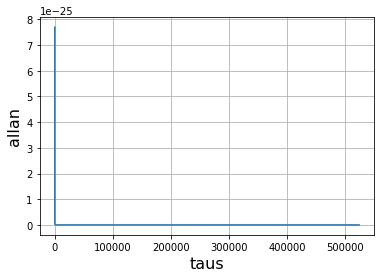

In [16]:
delta_02 = Y_t[0] - Y_t[2]
# Calculate Allan variance
(taus, adevs_02, errors, ns) = allantools.adev(delta_02)
print('taus - %s, adevs - %s' % (taus, adevs_02))

plot(taus, adevs_02)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

taus - [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
 6.40000e+01 1.28000e+02 2.56000e+02 5.12000e+02 1.02400e+03 2.04800e+03
 4.09600e+03 8.19200e+03 1.63840e+04 3.27680e+04 6.55360e+04 1.31072e+05
 2.62144e+05 5.24288e+05], adevs - [7.57784562e-25 3.34347727e-25 1.63707056e-25 8.15868495e-26
 4.10703825e-26 2.06350313e-26 1.06304899e-26 5.32497003e-27
 2.72919020e-27 1.36624614e-27 7.05445036e-28 3.29730496e-28
 1.70034924e-28 7.72758303e-29 2.43068646e-29 1.80843671e-29
 7.11417957e-30 5.15410053e-30 8.62350179e-32 7.04105973e-32]


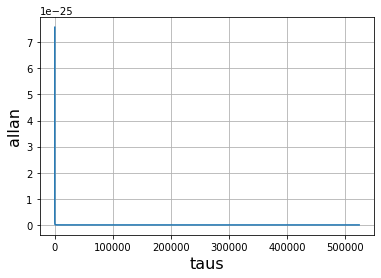

In [17]:
delta_12 = Y_t[1] - Y_t[2]
# Calculate Allan variance
(taus, adevs_12, errors, ns) = allantools.adev(delta_12)
print('taus - %s, adevs - %s' % (taus, adevs_12))

plot(taus, adevs_12)
xlabel('taus', fontsize=16)
ylabel('allan', fontsize=16)
grid(True)
show()

#### 3.2 每三台钟，换算一台钟的allan variance，依据公式（3），（4）

In [18]:
# TODO

#### 3.3 每两台钟，换算相关性C，依据公式（5）

In [19]:
# TODO

#### 3.4 计算Gamma，并绘图

In [20]:
# TODO